In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv(r"C:\Users\vanga\Downloads\Agrofood_co2_emission.csv")

# Handle missing values
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute numerical columns with median
num_imputer = SimpleImputer(strategy="median")
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute categorical columns with most frequent value
cat_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Encode categorical variable 'Area'
le = LabelEncoder()
df['Area'] = le.fit_transform(df['Area'])

# Save preprocessed data
df.to_csv("preprocessed_agrofood.csv", index=False)

print("Data preprocessing completed and saved.")


Data preprocessing completed and saved.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


# Load dataset
df = pd.read_csv("preprocessed_agrofood.csv")

# Feature-target split
X = df.drop(columns=['total_emission'])
y = df['total_emission']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Store results
results = []

# Helper function to evaluate and store results
def evaluate_and_store(model, name):
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    results.append({
        "Model": name,
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Train R²": r2_score(y_train, y_train_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Test R²": r2_score(y_test, y_test_pred)
    })

# Random Forest
rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}
rf_cv = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=10, random_state=42, n_jobs=1)
rf_cv.fit(X_train_scaled, y_train)
evaluate_and_store(rf_cv.best_estimator_, "Random Forest")


# Display results
results_df = pd.DataFrame(results)
print(results_df)


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load preprocessed dataset
df = pd.read_csv("preprocessed_agrofood.csv")

# Feature selection (X) and target (y)
X = df.drop(columns=['total_emission'])
y = df['total_emission']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

# Train models and collect results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Train R²": r2_score(y_train, y_train_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Test R²": r2_score(y_test, y_test_pred)
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)


               Model     Train MSE  Train R²      Test MSE   Test R²
0  Linear Regression  1.299929e+05  0.999997  1.295379e+05  0.999998
1      Decision Tree  8.076095e-12  1.000000  1.007038e+09  0.985442
2      Random Forest  3.585127e+07  0.999251  6.517168e+08  0.990579
3            XGBoost  1.038025e+06  0.999978  5.788084e+08  0.991633


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load dataset
df = pd.read_csv("preprocessed_agrofood.csv")

# Feature matrix and target variable
X = df.drop(columns=['total_emission'])
y = df['total_emission']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(verbosity=0),
    "AdaBoost": AdaBoostRegressor(),
    "SVR": SVR(),
    "MLP Regressor": MLPRegressor(max_iter=1000)
}

# Collect results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Train R²": r2_score(y_train, y_train_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Test R²": r2_score(y_test, y_test_pred)
    })

# Tabulate results
results_df = pd.DataFrame(results)
print(results_df)


               Model     Train MSE  Train R²      Test MSE   Test R²
0  Linear Regression  1.299929e+05  0.999997  1.295379e+05  0.999998
1      Decision Tree  8.076095e-12  1.000000  9.980284e+08  0.985572
2      Random Forest  3.488524e+07  0.999271  6.448060e+08  0.990678
3            XGBoost  1.038025e+06  0.999978  5.788084e+08  0.991633
4           AdaBoost  5.163382e+09  0.892078  5.672291e+09  0.917999
5                SVR  5.035259e+10 -0.052441  7.252440e+10 -0.048441
6      MLP Regressor  4.041738e+09  0.915522  3.523318e+09  0.949066


C:\Users\vanga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


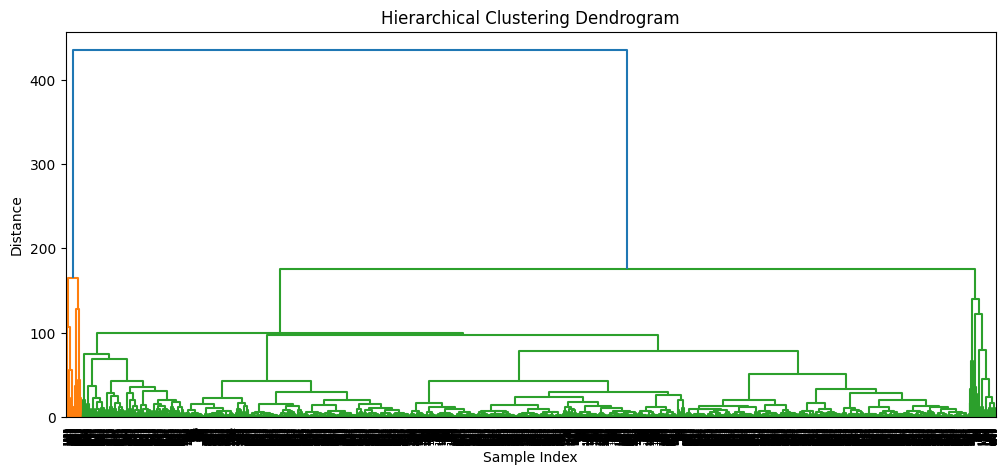

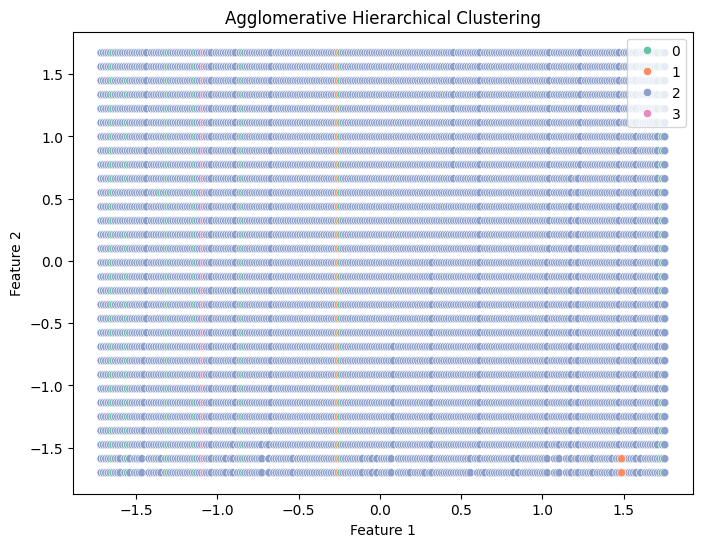

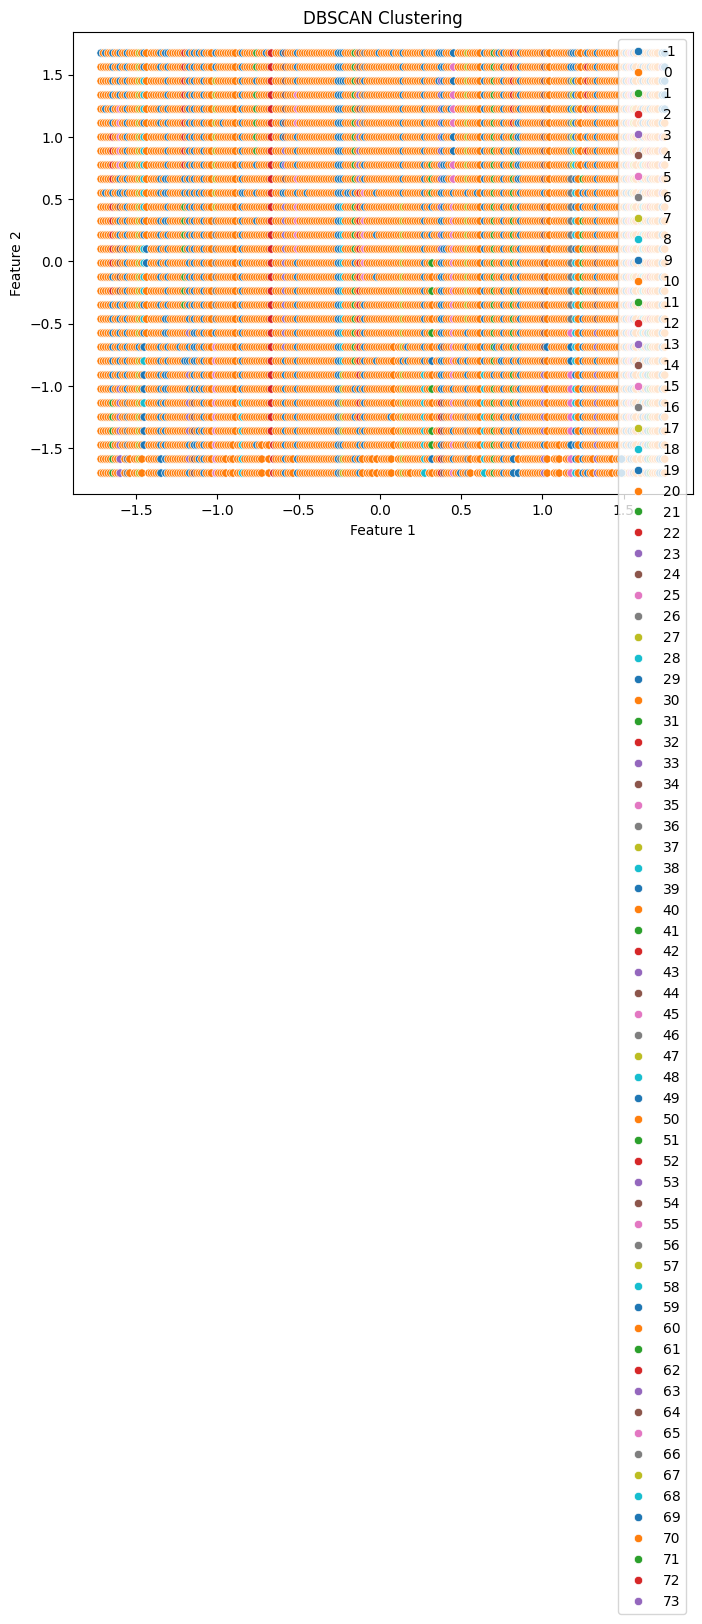

    Agglo_Cluster  DBSCAN_Cluster  Count
0               2               0   5348
1               2              -1    514
2               0              -1    141
3               1              -1     64
4               3              -1     62
..            ...             ...    ...
73              2               4      5
74              2              64      5
75              2              42      5
76              2              62      5
77              2              34      4

[78 rows x 3 columns]


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

# Load preprocessed dataset
df = pd.read_csv("preprocessed_agrofood.csv")

# Drop target column if present (used in regression/classification)
if 'total_emission' in df.columns:
    df = df.drop(columns=['total_emission'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# ================================
# Hierarchical Clustering
# ================================

# Plot Dendrogram (to decide number of clusters visually)
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Fit Agglomerative Clustering (choose clusters from dendrogram, e.g., 4)
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(X_scaled)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=agglo_labels, palette='Set2')
plt.title("Agglomerative Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# ================================
# DBSCAN Clustering
# ================================
dbscan = DBSCAN(eps=0.8, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=db_labels, palette='tab10')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Optional: Show cluster sizes
cluster_counts = pd.DataFrame({
    "Agglo_Cluster": agglo_labels,
    "DBSCAN_Cluster": db_labels
}).value_counts().reset_index(name='Count')

print(cluster_counts)
